# Open Street Map: 
OpenStreetMap is a free, editable map of the whole world that is being built by volunteers largely from scratch and released with an open-content license.


## Planet (data in a file)
It might be of interest see [_planet_](https://wiki.openstreetmap.org/wiki/Planet.osm
):

Planet.osm is the OpenStreetMap data in one file: all the nodes, ways and relations that make up our map. A new version is released every week. It's a big file (on 2024-02-01, the plain OSM XML variant takes over 1854.0 GB when uncompressed from the 134.7 GB bzip2-compressed or 72.8 GB PBF-compressed downloaded data file). 
There are also files called Extracts which contain OpenStreetMap Data for individual continents, countries, and metropolitan area


## API: [Overpass_API](https://wiki.openstreetmap.org/wiki/Overpass_API)
The Overpass API (formerly known as OSM Server Side Scripting, or OSM3S before 2011) is a read-only API that serves up custom selected parts of the OSM map data. It acts as a database over the web: the client sends a query to the API and gets back the data set that corresponds to the query.

Unlike the main API, which is optimized for editing, Overpass API is optimized for data consumers that need a few elements within a glimpse or up to roughly 10 million elements in some minutes, both selected by search criteria like e.g. location, type of objects, tag properties, proximity, or combinations of them. It acts as a database backend for various services
Here is the [user manual](https://dev.overpass-api.de/overpass-doc/en/).
## WFT is nominatim? 
Nominatim is a tool to search OSM data by name and address (geocoding) and to generate synthetic addresses of OSM points (reverse geocoding). It can be found at nominatim.openstreetmap.org the API manual can be found [here](https://nominatim.org/release-docs/develop/api/Overview). 

Calls:  
- /reverse: Reverse geocoding generates an address from a coordinate given as latitude and longitude.

- /search: The search API allows you to look up a location from a textual description or address. Nominatim supports structured and free-form search queries. The search query may also contain special phrases which are translated into specific OpenStreetMap (OSM) tags (e.g. Pub => amenity=pub). 

- /lookup:  The lookup API allows to query the address and other details of one or multiple OSM objects like node, way or relation.

## WTF with Overpass API: 
The Overpass API keeps a copy of the main database up to date with these minute updates and provides them for search. There exist not only public instances to which a request can be send. It is also possible to have your own instance because Overpass API is open source with easy installation.


# Imports

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration

# Code:

In [133]:
# Overpass example
overpass_url = "http://overpass-api.de/api/interpreter"

# Query can be done in a complete mexico scope
overpass_query = """
[out:json];
area["ISO3166-1"="MX"][admin_level=2];
(node["amenity"="restaurant"](area););
out center;
"""
# We can aswell filter only the corresponding nodes within a bounding box: 
#nwr(latitude_soutern_edge,longitude_western_edge,latitude_northern_edge,longitude_eastern_edge);
lat, lon = 19.430672, -99.196956

km1, km2 = 0.0864/16, 0.0864/16

latitude_soutern_edge =  lat - km1
longitude_western_edge = lon - km2
latitude_northern_edge = lat + km1
longitude_eastern_edge = lon + km2

overpass_query =f"""
[out:json];
nwr({latitude_soutern_edge},{longitude_western_edge},{latitude_northern_edge},{longitude_eastern_edge});
out;
"""

response = requests.get(
    overpass_url, 
    params={'data': overpass_query}
)
data = response.json()

In [134]:
elements = data.get("elements")
elements_df = pd.DataFrame(elements)

In [135]:
elements_df_reduced = elements_df[elements_df.tags.notna()&elements_df.lat.notna()]

In [136]:
v = elements_df_reduced["tags"].dropna().apply(lambda x: x.get("name")).dropna()

In [137]:
sushi = elements_df_reduced.loc[v[v.str.lower().str.contains("sushi")].index]

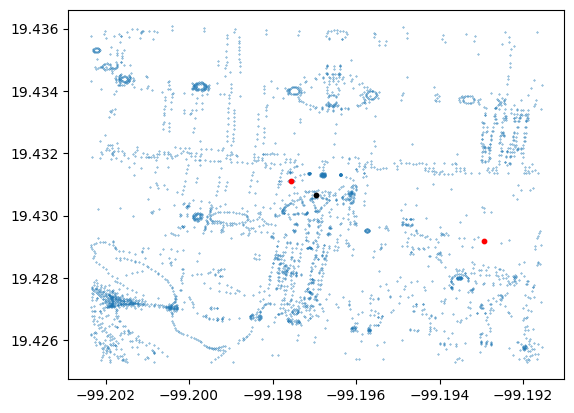

In [138]:
plt.scatter(elements_df.lon, elements_df.lat, s=0.1)
plt.scatter(sushi.lon, sushi.lat, s=10, c='r')
plt.scatter(lon, lat, s=10, c='k')

In [142]:
elements_df_reduced2 = elements_df_reduced[elements_df_reduced.tags.apply(lambda x: x.get('amenity')).notna()]

In [143]:
elements_df_reduced[elements_df_reduced.tags.apply(lambda x: x.get('amenity')).notna()]

,type,id,lat,lon,tags,nodes,members
292,node,2095149189,19.433841,-99.195656,{'amenity': 'fountain'},NaN,NaN
356,node,2260344119,19.435512,-99.192498,"{'addr:city': 'Ciudad de México', 'addr:countr...",NaN,NaN
359,node,2507500722,19.435740,-99.201446,"{'amenity': 'bicycle_parking', 'bicycle_parkin...",NaN,NaN
360,node,2507500724,19.433864,-99.199682,"{'amenity': 'bicycle_rental', 'brand': 'Ecobic...",NaN,NaN
361,node,2507500727,19.433441,-99.195751,"{'amenity': 'bicycle_parking', 'capacity': '24...",NaN,NaN
...,...,...,...,...,...,...,...
3169,node,11209513671,19.427170,-99.201618,"{'amenity': 'bench', 'backrest': 'no', 'materi...",NaN,NaN
3170,node,11209513672,19.427165,-99.201583,"{'amenity': 'bench', 'backrest': 'no', 'materi...",NaN,NaN
3171,node,11209513673,19.427152,-99.201639,"{'amenity': 'bench', 'backrest': 'no', 'materi...",NaN,NaN
3172,node,11209513674,19.427139,-99.201691,"{'amenity': 'bench', 'backrest': 'no', 'materi...",NaN,NaN


In [147]:
elements_df_reduced2[
    elements_df_reduced2.tags.apply(lambda x: x.get('amenity').startswith('rest'))
].tags.apply(lambda x: x.get('name')).sort_values().tail(50)


1764                             Frenchie
1811                              Gin Gin
630                    Gogó y Lolá Bistro
635                  Jaleo - Bar de Tapas
1408                  Jin San Shabu Shabu
2404                              Klein's
2492                                  Kyu
1494                          La Aceituna
1490                       La Buena Barra
869                           La Buena Fé
923                    La Casa Del Pastor
1312                           La Criolla
907                         La Encomienda
1687                    La No. 20 Polanco
1404          La Piedra Cantina Artesanal
1311                               La Rua
1488              Lampuga Restaurant &Bar
623     L´Entrecote - Le Relais de Venise
1423                               Makato
641                 Mar y Tierra La Única
899                Mezcalería Los Amantes
1612                  Nahnu -Tacos Árabes
1600                                 Nobu
1310                              